<img align="left" width="32%" style="padding-right:10px;" src="Images/Ccom.png">


___
# Review of Linear Algebra
## 2 Matrix Algebra

Jupyter Notebook Implementation: *Semme J. Dijkstra, 2022*

Original Linear Algebra text and in text examples: <br>*David E. Wells, Kresho Frankich, 1994*
___

<a href="https://teams.microsoft.com/l/team/19%3auL2OnH3RSfCWwU2Fd3VYGLT_03BYOfA3KB_OBp10CIY1%40thread.tacv2/conversations?groupId=5c11a428-14b6-429d-b7f5-a61ebc0a440b&tenantId=d6241893-512d-46dc-8d2b-be47e25f5666"><img src="Images/help.png"  title="Ask questions on Teams" align="right" width="10%" alt="Teams.com\"></a> 

Minor additional notes and edits: *Semme J. Dijkstra, 2022*<br>
Additional examples: *Semme J. Dijkstra, 2022*<br>
Python code and explanations: *Semme J. Dijkstra, 2022*
___

In [168]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin, cos
import numpy.linalg as la
from numpy.testing import assert_allclose
from my_code.latex_output import display_matrix
from my_code.boat import boat
# %matplotlib notebook # Can be useful when wanting to manipulate plots
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


___
<img align="left" width="6%" style="padding-right:10px;" src="./Images/info.png">

# LaTex<br>

This is a [Jupyter](https://jupyter.org/) notebook in which heavy use of [LaTex](https://www.latex-project.org/) is made. LaTex is *\"a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents.\"* according to [the Latex project](https://www.latex-project.org/)

Latex allows the creation of macros and other type-setting methods of convenience. This particular Markdown cell you are reading is used for the definition of new LaTex operators and commands, but they are hidden from view. If you are interested: double click on this cell to enter its edit mode and you will be able see how they are implemented.

<div hidden>
$\usepackage{amsmath,amssymb}$

$\DeclareRobustCommand{\bbone}{\text{\usefont{U}{bbold}{m}{n}1}}$

$\DeclareMathOperator{\EX}{\mathbb{E}}% expected value$

$\DeclareMathOperator{\res}{\vec{r}}$

$\DeclareMathOperator{\mf}{\mu_{1}\sigma_{2}^{2}+\mu_{2}\sigma_{1}^{2}\over{\sigma_{1}^{2} + \sigma_{2}^{2}}}$
    
$\DeclareMathOperator{\sf}{{\sigma_{1}^{2}\sigma_{2}^{2}}\over{\sigma_{1}^{2}+\sigma_{2}^{2}}}$
    
$\newcommand{\ex}[1]{\mathbb{E}\{#1\}}$
    
$\newcommand{\dev}[1]{\mathbb{E}\{#1^o_i - \mathbb{E}\{#1\}\}}$
    
$\newcommand{\cov}[1]{\mathbb{E}\{(#1^o_i - \mathbb{E}\{#1\})(#1 - \mathbb{E}\{#1\})^T\}}$
    
$\newcommand{\m}[1]{\mathbf{#1}}$

$\newcommand{\col}[2]{\begin{pmatrix}#1 \\ #2 \end{pmatrix}}$
    
</div>

___
## 2.1 Special Matrices

We will often be concerned with matrices having the same numbers of columns as rows. Such a matrix ks called a ***square*** matrix:

$$_n\m{S}_n=\begin{pmatrix}
a_{11} & a_{12} & \dots & a_{1n}\\
a_{21} & a_{22} & \dots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \dots & a_{nn}
\end{pmatrix}\tag{4}$$


A square matrix having all elements zero except along the principal diagonal running from the top left to the bottom right is a ***diagonal matrix***:

$$_3\m{D}_3=\begin{pmatrix}
-1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0
\end{pmatrix}\tag{5}$$

A diagonal matrix which has all the diagonal elements equal is called a ***scalar matrix***:

$$_4\m{K}_4=\begin{pmatrix}
3 & 0 & 0 & 0\\
0 & 3 & 0 & 0\\
0 & 0 & 3 & 0\\
0 & 0 & 0 & 3
\end{pmatrix}\tag{6}$$

A scalar matrix which has diagonal elements equal to one is called a ***unit*** or ***identity matrix*** and is usually denoted $I$:

$$_2\m{I}_2=\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}\tag{7}$$


___
### 2.1 Self Study Exercise 1

1. Write out the linear equations $\m{Ax} = \m{y}$ explicitly when $\m{A}$ is equal to the examples $(4)$ to $(7)$ on a piece of paper.

2. Explain why these matrices are considered special by for each one commenting on the nature of the equations that you developed in 1.

In [169]:
# 2.1 Self Study Exercise 1

q_2_1_1_1 = 'The square matrix S ...'
q_2_1_1_2 = 'The diagonal matrix D ...'
q_2_1_1_3 = 'The scalar matrix K ...'
q_2_1_1_4 = 'The Identity matrix I ...'

A square matrix in which all the elements above the diagonal are zero is a ***lower triangular*** matrix:

$$_3\m{L}_3=\begin{pmatrix}
5 & 0 & 0\\
7 & 9 & 0\\
8 & 6 & 3
\end{pmatrix}\tag{8}$$

If all the elements below the diagonal are zero, it is an ***upper triangular*** matrix.

$$_3\m{U}_3=\begin{pmatrix}
3 & 1 & 1 & 1\\
0 & 3 & 1 & 1\\
0 & 0 & 3 & 1\\
0 & 0 & 0 & 3
\end{pmatrix}\tag{9}$$

If the equivalent elements above and below the diagonal are equal (that is for $\m{A}$  $a_{ij}=a_{ji}\forall i,j$) then the matrix is a ***symmetric matrix***

$$_2\m{S}_2=\begin{pmatrix}
2 & 3 \\
3 & 1
\end{pmatrix}\tag{10}$$

___
### 2.1 Self Study Exercise 2

1. Write out the linear equations $\m{Ax} = \m{y}$ explicitly, when $\m{A}$ is equal to the examples $(8)$ to $(10)$ on a piece of paper.

2. Comment on the nature of these equations in each case in the code cell below

In [170]:
# 2.1 Self Study Exercise 2

q_2_1_2_1 = 'The matrix L above ...'
q_2_1_2_2 = 'The matrix U above ...'
q_2_1_2_3 = 'The matrix S above ...'

Finally, if all the elements of a matrix are zero the matrix is called a ***null matrix***, denoted $\m{0}$.

$$_2\m{0}_3=\begin{pmatrix}
0 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix}\tag{11}$$

___
 <a id='Basic_Matrix_Operations'></a>
## 2.2 Basic Matrix Operations

The four basic operations on scalars are familiar: 
    
    - addition
    - subtraction
    - multiplication
    - division
    
Close equivalents of the first three of these are used on matrices. While there is no direct matrix equivalent to scalar division, matrix *inversion* is equivalent to taking the *reciprocal* of a scalar. This is discussed separately in the next section. There are some other operations on matrices that have no scalar equivalent, such as the multiplication of a matrix by a scalar, ***transposition*** of a matrix, finding the ***trace*** of a matrix, and finding the ***determinant*** of a matrix.


### 2.2.0 Basic Matrix Operations and `numpy` Broadcasting

Note that `numpy` supports a mechanism not part of Linear Algebra known as ***Broadcasting***. From the [`numpy` pages:](https://numpy.org/doc/stable/user/basics.broadcasting.html):

    The term broadcasting describes how NumPy treats arrays with different 
    shapes during arithmetic operations. Subject to certain constraints, the 
    smaller array is “broadcast” across the larger array so that they have 
    compatible shapes. Broadcasting provides a means of vectorizing array 
    operations so that looping occurs in C instead of Python. It does this 
    without making needless copies of data and usually leads to efficient 
    algorithm implementations. There are, however, cases where broadcasting 
    is a bad idea because it leads to inefficient use of memory that slows 
    computation.
    
From the above it follows that we generally should make use of the implicit expansion that `broadcasting` provides. It leads to more legible code that is usually more efficient. However, it does violate the idea that the order of matrices (scalars and vectors being special cases of matrices) should be consistent with the mathematical operation to be performed. In these Notebooks we will generally give examples of the 'proper' linear algebra, but when the implications are obvious we will make use of broadcasting.

NumPy operations are usually done on pairs of arrays on an element-by-element basis. In the simplest case, the two arrays must have exactly the same shape, as in the following example (we will use an example of matrix addition which you will learn about in [2.2.2 Basic Matrix Operations: Addition]

Again from the [`numpy` pages:](https://numpy.org/doc/stable/user/basics.broadcasting.html):
    
    The result is equivalent to the previous example where b was an array. We can 
    think of the scalar b being stretched during the arithmetic operation into 
    an array with the same shape as a. The new elements in b, as shown in Figure 1, 
    are simply copies of the original scalar. The stretching analogy is only 
    conceptual. NumPy is smart enough to use the original scalar value without 
    actually making copies so that broadcasting operations are as memory and 
    computationally efficient as possible.
    
    A scalar is broadcast to match the shape of the 1-d array it is being 
    multiplied to. In the simplest example of broadcasting, the scalar b is 
    stretched to become an array of same shape as a, so the shapes are 
    compatible for element-by-element multiplication.

This is the statement that really warrants the step-by-step explanation; what happens here is not part of traditional linear algebra, but is a very useful addition for when you program - the process is called **implicit expansion** and allows you to write cleaner, easy to understand code. 

Imagine you have a matrix $\m{A} holding the vertices:
    
$$\m{v}_1=\col{-2}{-6}, \m{v}_2=\col{-2}{4}, \m{v}_3=\col{0}{6}, \m{v}_4=\col{2}{4}, \m{v}_5=\col{2}{-6}$$

$$\m{A} = \left(\begin{array}{c|c|c|c|c|c} \m{v}_1 & \m{v}_2 & \m{v}_3 & \m{v}_4 & \m{v}_5 & \m{v}_6\end{array}\right)$$

And you want to add a vector $\m{t}$ to each of these you would end have to create a matrix $\m{T}$ of the form:

$$\m{T} = \left(\begin{array}{c|c|c|c|c|c} \m{t} & \m{t} & \m{t} & \m{t} & \m{t} & \m{t}\end{array}\right)$$

to then offset all the vertices

$$\m{A}_t = \m{A} + \m{T}$$

whereas in using `numpy` we may simply write 

    At = A + t

without having to expand `t`. In linear algebra there is a mismatch in dimensions in the expression written above. Python recognizes this and replaces the vector $\m{t}$ represented by the variable `t` by the matrix $[\m{t, t, ... t}]$ matching the number of columns in `B` and thus resulting in the addition of the vector `t` to every vertex contained within `A`. Thus matrix `At` is matrix `A` transformed by pure translation vector `t` (you'll learn what a pure translation is in [3 Solution of Linear Equations ](3_Solution_of_Linear_Equations.ipynb)).


In [171]:
# Code example showing the effect of broadcasting

# Vertices
v1 = np.array([[-2], [-6]])
v2 = np.array([[-2], [4]])
v3 = np.array([[0], [6]])
v4 = np.array([[2], [4]])
v5 = np.array([[2], [6]])
A = np.column_stack((v1,v2,v3,v4,v5))

# Translation vector
t = np.array([[3], [4]])

# Matrix of vertices
At = A + t

# Translated matrix of vertices
display_matrix(At)

<IPython.core.display.Math object>

___
### 2.2.1 Basic Matrix Operations: Equality

Two matrices $_m\m{A}_n$ and $_p\m{B}_q$ are *identical* only if they have the same dimensions i.e., $m=p$ and $n=q$, and if all corresponding elements are equal $(a_{ij}=b_{ij}\text{  }\forall\text{  }i,j)$. Note that the $\forall$ symbol means **'for all'**.

The `equality operator` in `numpy` will allow the evaluation of `numpy` arrays of unequal dimension through broadcasting, which may have unexpected results for the unwary!!


___
### 2.2.1.1 Basic Matrix Operations: Equality and Using Numpy Arrays

`numpy` handles arrays very efficiently, but this comes with some consequences that initially may be confusing to programmers. 

If you for example want to create a copy of an instance of a matrix $\m{A}$ and name it $\m{B}$ it is tempting to use:

    B = A

In [172]:
A = np.asarray([[1., 2.], [3., 4.]])
print('Matrix A:')
display_matrix(A)
B = A
print('Matrix B:')
display_matrix(B)

Matrix A:


<IPython.core.display.Math object>

Matrix B:


<IPython.core.display.Math object>

From the above code cell it appears that everything worked as intended, the elements of `B` match those of `A` and we can happily use `B` for our purposes. But let us first see what happens if we change an element of `B`:

In [173]:
A = np.asarray([[1., 2.], [3., 4.]])
B = A
B[0, 0] = 11
print('Matrix A after manipulation of B:')
display_matrix(A)
print('Matrix B after manipulation of B:')
display_matrix(B)

Matrix A after manipulation of B:


<IPython.core.display.Math object>

Matrix B after manipulation of B:


<IPython.core.display.Math object>

This is probably not the outcome that you expected. What happened here is that `B` is **completely identical** to `A`, it is another reference to the place in your computers memory that holds the variable `A` i.e., the **elements** of `A` are the exact same as those of `B`. This is helpful for writing efficient code, especially if you want `B` to represent a subset of `A`, *but for the unwary it often leads to unintended consequences*.

If we intend to create a matrix `B` independent of `A` i.e., that has different **elements** but that hold the same **element values** as `A` we should use the `copy` method provided by `numpy`: 

    B = A.copy()

In [174]:
A = np.asarray([[1., 2.], [3., 4.]])
B = A.copy()
print('Matrix A')
display_matrix(A)
print('Matrix B')
display_matrix(B)
B[0, 0] = 11
print('Matrix A after manipulation of B:')
display_matrix(A)
print('Matrix B after manipulation of B:')
display_matrix(B)

Matrix A


<IPython.core.display.Math object>

Matrix B


<IPython.core.display.Math object>

Matrix A after manipulation of B:


<IPython.core.display.Math object>

Matrix B after manipulation of B:


<IPython.core.display.Math object>

___
<img align="left" width="6%" style="padding-right:10px;" src="./Images/info.png">

## `C = A.copy()` vs `C=A`<br>



often it is `C = A.copy()` that we should use, especially as an inexperienced coder. If you want to write very fast code you should note that this is a much more costly statement than `C=A` which creates a second name for `A`. In the case of `C = A.copy()` the size of `A` must be determined, then an unused location in memory that allows the storage of a variable of that size needs to be found, and finally, all the properties and  element values of `A` need to be copied; this is a much costlier set of operations in terms of memory and cpu usage.

All in all:

- `C=A` is very fast, uses little memory, but may have unintended consequences for the unwary
- `C = A.copy()` is slow, at least doubles memory usage, but leads to more easily predictable behavior

___
### 2.2.1.2 Basic Matrix Operations: `NumPy` Array Equivalency: `numpy.testing.assert_allclose()`

Before going further: **the appropriate statement to evaluate the equivalence of matrices $\m{A}$ and $\m{B}$ using `numpy` is:**

- [numpy.array_equal(A,B)](https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html)
    
**Though in reality we must usually test for close equivalence** 

- [numpy.testing.assert_allclose(A,B)](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_allclose.html)


In python code you will often see the `==` operator *mis*used to test equality, `numpy` extends the use of the `==` operator to `numpy arrays`. Given the difference in use of the assignment operator (`=`) in `numpy` it should be stressed that the `==` verifies the equivalence of the types and values of the elements, not whether these are the same locations in your memory. Using the `==` operator to test equivalence can be dangerous for reasons that you will see below.

It is probably best to explain the use of the equality operator with `numpy` arrays at the hand of some examples

In [175]:
x = np.asarray([3.])  # Creates a 1x1 array with a single element of value 3
print(3 == x)

[ True]


In the code cell above a $1\times 1$ `numpy` array is created that has a single element that holds the value 3. In this case it is compared to the scalar $3$ and since there is only value in the array the returned value is a $1\times 1$ `numpy` array with the boolean element value `True`. 

In [176]:
x = np.asarray([3., 3.])  # Creates a 1x2 array with a elements of value 3
X = np.asarray([[1., 2.], [3, 4]])  # Creates a 2x2 array
print('3==x\n'+str(3 == x))
print()
print('3==X\n'+str((3 == X)))

3==x
[ True  True]

3==X
[[False False]
 [ True False]]


In the code cell above a row vector `x` and a matrix `X` In this case `numpy` recognizes the size difference and iterates through all the element values returning a boolean value for each. 

In [177]:
x = np.asarray([3., 3.])  # Creates a 1x2 array with elements of value 3
X = np.asarray([[1., 2.], [3., 4.]])  # Creates a 2x2 array
print('3==x '+str((3 == x).all()))
print()
print('3==X '+str((3 == X).all()))

3==x True

3==X False


We consider matrices unequal if *any* of the elements is unequal. For testing arrays `numpy` provides the `all()` method to evaluate whether all its contents evaluate to `True`

In [178]:
x = np.asarray([1., 2.])  # Creates a 1x2 array
X = np.asarray([[1., 2.], [1., 2.]])  # Creates a 2x2 array
print('x==X\n'+str((x == X)))
print()
print('x==X '+str((x == X).all()))

x==X
[[ True  True]
 [ True  True]]

x==X True


**The code cell above demonstrates the pitfall for comparing matrices using the `==` operator; the vector `x` is *not* equal to the matrix `X`! However, due to broadcasting `(x==X).all()` fails to recognize this.**

In [179]:
# Creates a 1x2 array with a single element of value 3
x = np.asarray([1., 2.])
X = np.asarray([[1., 2.], [1., 2.]])  # Creates a 2x2 array

print('np.array_equal(x,X): ' + str(np.array_equal(x,X)))

np.array_equal(x,X): False


The code cell shows that in this case we get the desired result i.e., the vector `x` and matrix `X` are identified as unequal. However, there is still potential for trouble. Imagine that `X` and `Xt` are matrices representing the same quantity, but due to numerical inaccuracies are insignificantly different. We then want the comparison of `X` and `Xt` to result in  a `True` value.

In [180]:
# Creates a 1x2 array with a single element of value 3
X = np.asarray([[1., 2.], [1., 2.]])  # Creates a 2x2 array
Xt = X.copy()
Xt[0,0] += 1**10-9

print('np.array_equal(x,X): ' + str(np.array_equal(x,X)))

np.array_equal(x,X): False


**The code cell above demonstrates the pitfall for comparing matrices using the n`p.array_equal()` function; the vector `Xt` is equal to the matrix `X` for our purpose! However, due to insignificant differences `np.array_equal()` fails to recognize this.**

There is provision for this type of evaluation in the `numpy` module through the `numpy.testing.assert_allclose` function. This functions creates an error if the shape or the values are not the same, thus we need to use a `try` and `except` to handle the outcomes. 

Note that we have 

In [182]:
# Creates a 1x2 array with a single element of value 3
X = np.asarray([[1., 2.], [1., 2.]])  # Creates a 2x2 array
Xt = X.copy()
Xt[0,0] += 10**-7

try:
    assert_allclose(X,Xt)
    print('`X` and `Xt` are equal within tolerance')
except:
    print('`X` and `Xt` are not equal within tolerance')


`X` and `Xt` are equal within tolerance


This is the outcome that we should find. In short your life will be easier if you:

#### Test matrix equivalence using the `numpy.array_equal( )` method, or...
#### Test matrix equivalence using the `numpy.testing.assert_allclose()` method for tolerable differences

Both methods test the matrix dimensions as well as the element values. However, for practical purposes `numpy.testing.assert_allclose()` is often preferable, as demonstrated in the code cell above

___

### 2.2.2 Basic Matrix Operations: Addition

The addition of two matrices $_m\m{A}_n$ and $_p\m{B}_q$ can be performed when the matrices are *conformable for addition*: they must have the number of rows i.e., $m=p$, and columns i.e. $n=q$. Then the sum is:

$$_m\m{C}_n=_m\m{A}_n+_m\m{B}_n\tag{12}$$

where:

$$c_{ij} = a_{ij} +b_{ij}\text{  }\forall\text{  }i,j\tag{13}$$ 

For example, given:
$$_2\m{A}_2=\begin{pmatrix}3 & 1 \\1 & 5\end{pmatrix}\tag{14}$$

$$_2\m{B}_2=\begin{pmatrix}2 & 6 \\5 & 3\end{pmatrix}\tag{15}$$

then
$$_2\m{C}_2=_m\m{A}_n+_m\m{B}_n=\begin{pmatrix}3+2 & 1+6 \\1+5 & 3+5\end{pmatrix}=\begin{pmatrix}5 & 7 \\6 & 8\end{pmatrix}\tag{16}$$

Matrix addition is ***commutative***:

$$\m{A}+\m{B}=\m{B}+\m{A}\tag{17}$$

Matrix addition is ***associative***:

$$(\m{A}+\m{B})+\m{C}=\m{A}+(\m{B}+\m{C})\tag{18}$$




___

### 2.2.2 Self Study Exercise 1

1. Create the matrices $\m{A}$ and of $\m{B}$ (14) and (15) as `numpy` arrays `A` and `B`
2. Print arrays `A` and `B` as matrices using the `display_matrix()` function defined in the `display_matrix.py` file found in the `my_code` folder.
3. Calculate matrix $\m{C}$ as defined in (16) and assign it to `C`
4. Demonstrate that addition is commutative using `A`, `B` and the `numpy.array_equal()` function
5. Demonstrate that addition is associative using `A`, `B`, `C` and the `numpy` `assert_allclose()` function

In [185]:
# 2.2.2 Self Study Exercise 1
# 1. Create the matrices of (14) and (15) as `numpy` arrays `A` and `B`
A = np.asarray([[3, 1], [1, 5]])
B = np.asarray([[2, 6], [5, 3]])

# 2. Print matrices A and B using the `display_matrix()` function
print('A:')
display_matrix(A)
print('B:')
display_matrix(B)

# 3. Calculate matrix C
C = A+B
print('C = A + B:')
display_matrix(C)

# 4. Demonstrate addition is commutative
if np.array_equal(A+B, B+A):
    print('Addition is commutative')
else:
    print('Addition is not commutative')

# 5. Demonstrate addition is associative
try:
    assert_allclose(A+(B+C), (A+B)+C)
    print('Addition is associative')
except:
    print('Addition is not associative')

A:


<IPython.core.display.Math object>

B:


<IPython.core.display.Math object>

C = A + B:


<IPython.core.display.Math object>

Addition is commutative
Addition is associative


___
Worked Example:

<img align="left" width="30%" style="padding-left:100px;padding-right:10px" src="Images/sse2_2_2_1.png">

___

### 2.2.3 Basic Matrix Operations: Subtraction

The subtraction of two matrices $_m\m{A}_n$ and $_p\m{B}_q$ is analogous to the addition. Thus the difference is:

$$_m\m{C}_n=_m\m{A}_n-_m\m{B}_n\tag{19}$$

where:

$$c_{ij} = a_{ij} -b_{ij}\text{  }\forall\text{  }i,j\tag{20}$$ 

For example, given the matrices from $(14)$ and $(15)$:

$$_2\m{C}_2=_m\m{A}_n-_m\m{B}_n=\begin{pmatrix}3-2 & 1-6 \\1-5 & 5-3\end{pmatrix}=\begin{pmatrix}1 & -5 \\-4 & 2\end{pmatrix}$$

Matrix subtraction is not commutative:

$$\m{A}-\m{B}\neq\m{B}-\m{A}$$

Matrix subtraction is not associative:

$$(\m{A}-\m{B})+\m{C}\neq\m{A}-(\m{B}+\m{C})$$

___

### 2.2.3 Self Study Exercise 1

1. Create the matrices of (14) and (15) as `numpy` arrays `A` and `B`.
2. Print matrices A and B using `display_matrix()`
3. Calculate matrix C as A-B (19)
4. Demonstrate that subtraction is commutative using `A`, `B` and `assert_allclose()` 
5. Demonstrate that subtraction is associative using `A`, `B`, `C` and `assert_allclose()`

In [221]:
# 2.2.3 Self Study Exercise 1
# 1. Create the matrices of (14) and (15) as `numpy` arrays `A` and `B`.
A = np.asarray([[3, 1], [1, 5]])
B = np.asarray([[2, 6], [5, 3]])

# 2. Print matrices A and B using `display_matrix()`
print('A:')
display_matrix(A)
print('B:')
display_matrix(B)

# 3. Calculate matrix C as A-B
C = A-B
print('C = A - B:')
display_matrix(C)

# 4. Demonstrate that subtraction is not commutative
try:
    assert_allclose(A-B, B-A)
    print('Subtraction is commutative')
except:
    print('Subtraction is not commutative')

# 5. Demonstrate addition is not associative
try:
    assert_allclose(A-(B-C), (A-B)-C)
    print('Subtraction is associative')
except:
    print('Subtraction is not associative')

A:


<IPython.core.display.Math object>

B:


<IPython.core.display.Math object>

C = A - B:


<IPython.core.display.Math object>

Subtraction is not commutative
Subtraction is not associative


___
Worked Example:

<img align="left" width="30%" style="padding-left:100px;padding-right:10px" src="Images/sse2_2_3_1.png">

___

### 2.2.4 Basic Matrix Operations: Scalar Multiplication

The ***scalar multiplication*** of a matrix $_m\m{A}_n$ ais obtained when the matrix is multiplied by a scalar $k$:

$$_m\m{B}_n = k _m\m{A}_n\tag{21}$$

where

$$b_{ij} = k\cdot a_{ij}\text{  }\forall\text{  }i,j\tag{22}$$

Scalar multiplication is commutative:
<a id='eq23'></a>
$$k\m{A} = \m{A}k\tag{23}$$

___

### 2.2.4 Self Study Exercise 1

1. Create the matrix of (14) as `numpy` array `A`
2. Create scalar `k` and assign it the value 3
3. Demonstrate that scalar multiplication is commutative using `k`, `A` and the `assert_allclose()` function

In [222]:
# 2.2.4 Self Study Exercise 1
# 1. Create the matrix of (14) as `numpy` array `A`
A = np.asarray([[3, 1], [1, 5]])

# 2. Create scalar `k` and assign it the value 3
k = 3

# Demonstrate addition is commutative
try:
    assert_allclose(k*A, A*k)
    print('Scalar multiplication is commutative')
except:
    print('Scalar multiplication is not commutative')

Scalar multiplication is commutative


Worked Example:
    
    Scalar multiplication is commutative

___

### 2.2.4 Basic Matrix Operations: Multiplication

The multiplication of two matrices $_m\m{A}_n$ and $_p\m{B}_q$ can be performed only when the matrices are *conformable for multiplication*,  which is when the number of columns of $_m\m{A}_n$ matches the number of rows $_m\m{B}_n$ i.e, $n=p$. 

$$_m\m{C}_q = _m\m{A}_n\cdot_p\m{B}_q\tag{24}$$

where:
 <a id='eq25'></a>
$$c_{ij} = \sum_{k=1}^{n}a_{ik}b_{k,j}\forall\text{  }i,j\tag{25}$$

that is, $c_{ij}$ is the sum of the products of the elements in the $i$-th row of $\m{A}$ and $j$-th column of $\m{B}$, taken term by term. For example, given:

$$_2\m{A}_3 = \begin{pmatrix}3 & 1 & 4 \\1 & 5 & 9\end{pmatrix}\tag{26}$$

$$_3\m{B}_1 = \begin{pmatrix}2 \\6\\5\end{pmatrix}\tag{27}$$

$$_2\m{C}_1 = \begin{pmatrix}3*2+1*6+4*5\\1*2+5*6+9*5\end{pmatrix}=\begin{pmatrix}32\\77\end{pmatrix}\tag{28}$$


In `numpy` matrix multiplication has it's own operator: `@`, the `*` operator may also be used, but results in element-wise multiplication.

___

### 2.2.4 Self Study Exercise 2

1. Create the matrices of (26) and (27) as `numpy` arrays `A` and `B`.
2. Calculate `C` as the product of `A` and `B` using the `@` operator
3. Display C using the `display_matrix()` function
4. Does the result comply with (28)?

In [223]:
# 2.2.4 Self Study Exercise 2

# 1. Create the matrices of (26) and (27)
A = np.asarray([[3, 1, 4], [1, 5, 9]])
B = np.asarray([[2], [6], [5]])

# 2. Calculate `C` as the product of `A` and `B` using the `@` operator
C = A@B

# 3. Display C using the `display_matrix()` function
print('C:')
display_matrix(C)

q_2_2_4_2 = 'The result ...'

C:


<IPython.core.display.Math object>

___
Worked Example:

<img align="left" width="20%" style="padding-left:100px;padding-right:10px" src="Images/sse2_2_4_2.png">

___
Matrix multiplications have the following properties:

$\begin{array}{|c|c|}\hline
(\m{A} (\m{B}+\m{C}) = \m{A}\m{B}+\m{A}\m{C} & \text{distributive}\\
(\m{A}+\m{B})\m{C}=\m{A}\m{C}+\m{B}\m{C} & \text{distributive}\\
\m{A}(\m{B}\m{C})=(\m{A}\m{B})\m{C} & \text{associative} \\
\m{A}\m{B}\neq\m{B}\m{A} & \text{not generally commutative}\\
\m{A}\m{B}=\m{A}\m{C} & \text{does NOT imply }\m{B}=\m{C}\\
\m{A}\m{B}=\m{0} & \text{does NOT imply }\m{A}=\m{0}\text{ or }\m{B}=\m{0}\\
\hline\end{array}\tag{29}$

Products $\m{A}\m{B}$ and $\m{B}\m{A}$ will both exist only if $\m{A}$ and $\m{B}$ are doubly conformable. For example $_n\m{A}_m$ and $_m\m{B}_n$ are doubly conformable (the number of rows of in one equals the number of columns in the other). Square matrices of the same size are double conformable. However, even should $\m{A}\m{B}$ and $\m{B}\m{A}$ both exist in general:

$$\m{A}\m{B}\neq\m{B}\m{A}\tag{30}$$

For example, given:

$$_2\m{A}_2 = \begin{pmatrix} 1 & 2\\3 & 4\end{pmatrix}\tag{31}$$

$$_2\m{B}_2 = \begin{pmatrix} 5 & 6\\7 & 8\end{pmatrix}\tag{32}$$

then:

$$\m{AB} = \begin{pmatrix} 19 & 22\\43 & 50\end{pmatrix}\tag{33}$$

$$\m{BA} = \begin{pmatrix} 23 & 34\\31 & 46\end{pmatrix}\tag{34}$$


___

### 2.2.4 Self Study Exercise 3

1. Create the matrices of (31) and (32) as `numpy` arrays `A` and `B`
2. Display the product AB
3. Display the product BA

In [224]:
# 2.2.4 Self Study Exercise 3
# 1. Create the matrices of (31) and (32) as `numpy` arrays `A` and `B`
A = np.asarray([[1, 2], [3, 4]])
B = np.asarray([[5, 6], [7, 8]])

# 2. Display the product AB
print('AB:')
display_matrix(A@B)

# 3. Display the product BA
print('BA:')
display_matrix(B@A)

AB:


<IPython.core.display.Math object>

BA:


<IPython.core.display.Math object>

___
Worked Example:

<img align="left" width="25%" style="padding-left:100px;padding-right:10px" src="Images/sse2_2_4_3.png">

___
in the special case of two square matrices $\m{A},\m{B}$ such that:

$$\m{A}\m{B}=\m{B}\m{A}\tag{35}$$

the matrices are called ***commutative matrices***. Every square matrix is commutative with itself and with the identity matrix. Diagonal matrices of the same order are also commutative. Other examples exist:

$$_2\m{A}_2 = \begin{pmatrix} 4 & -2\\6 & 2\end{pmatrix}\tag{36}$$

$$_2\m{B}_2 = \begin{pmatrix} 3 & -1\\3 & 2\end{pmatrix}\tag{37}$$

for which:

$$\m{AB}=\m{BA}=\begin{pmatrix} 6 & -8\\24 & -2\end{pmatrix}\tag{38}$$ 

___

### 2.2.4 Self Study Exercise 4

1. Create the matrices of (36) and (37) as `numpy` arrays `A` and `B`.
2. Display the product AB
3. Display the product BA

In [225]:
# 2.2.4 Self Study Exercise 4
# Define and print A
A = np.asarray([[4, -2], [6, 2]])
B = np.asarray([[3, -1], [3, 2]])

# 2. Display the product AB
print('AB:')
display_matrix(A@B)

# 3. Display the product BA
print('BA:')
display_matrix(B@A)

AB:


<IPython.core.display.Math object>

BA:


<IPython.core.display.Math object>

___
Worked Example:

<img align="left" width="25%" style="padding-left:100px;padding-right:10px" src="Images/sse2_2_4_4.png">

___

### 2.2.5 Basic Matrix Operations: Transposition

When in a matrix $\m{A}$ the rows and columns are interchanged, we obtain the ***transpose matrix*** denoted by $\m{A}^T$ or $\m{A}'$. For example, if we say $\m{B}=\m{A}^T$ then for:

$$_2\m{A}_3 = \begin{pmatrix}1&7&-2\\4&3&5\end{pmatrix}\tag{39}$$

$$_3\m{B}_2 = \m{A}^T = \begin{pmatrix}1&4\\7&3\\-2&5\end{pmatrix}\tag{40}$$

where:

$$ b_{ij} = a_{ji}\forall\text{  }i,j\tag{41}$$

Transposition has the following properties:

$$(\m{A}^T)^T = \m{A}\tag{42}$$

$$(\m{A}+\m{B})^T = \m{A}^T+\m{B}^T\tag{43}$$

<a id='eq44'></a>
$$(\m{A}\m{B})^T = \m{B}^T\m{A}^T\tag{note the reverse order) (44}$$

$$(k\m{A})^T = k\m{A}^T\tag{45}$$

A square symmetric matrix $\m{A}$ and its transpose $\m{A}^T$ are equal ($\m{A} = \m{A}^T$), since for symmetric matrices $ a_{ij} = a_{ji}\forall\text{  }i,j$. For any square matrix $\m{A}$, $(\m{A}+\m{A}^T)$ and $\m{A}\m{A}^T$ will be symmetric.

`Numpy` provides the transpose of an array through the attribute `T` i.e., the transpose of `A` is `A.T`.

___

### 2.2.5 Self Study Exercise 1

1. Create and display the matrix `A` of (39)
2. Assign `B` the value of the transpose of `A`
3. display `B`


In [226]:
# 2.2.5 Self Study Exercise 1
# 1. Create and display the matrix `A` of (39)
A = np.asarray([[1, 7, -2], [4, 3, 5]])
print('A:')
display_matrix(A)

# 2. Assign `B` the value of the transpose of `A`
B = A.T

# 3. display `B`
print('B:')
display_matrix(B)

A:


<IPython.core.display.Math object>

B:


<IPython.core.display.Math object>

___
Worked Example:

<img align="left" width="30%" style="padding-left:100px;padding-right:10px" src="Images/sse2_2_5_1.png">

___
### 2.2.6 Basic Matrix Operations: Transposition

For a square matrix $\m{A}$ the sum of the elements along the main diagonal is called the ***trace*** of $\m{A}$ and is denoted by $\text{tr}(\m{A})$:

$$\text{tr}(_n\m{A}_n) = \sum_{i=1}^{n}a_{ii}\tag{46}$$

For example, given the matrix:

$$_3\m{A}_3 = \begin{pmatrix}1&2&3\\4&5&6\\7&8&9\end{pmatrix}\tag{47}$$

its trace is 

$$\text{tr}(\m{A})=1+5+9 = 15\tag{48}$$

`numpy` allows you to determine the trace value through the `trace()` method e.g., the trace of `A` is found by `A.trace()`

___

### 2.2.6 Self Study Exercise 1

1. Create the matrix `A` of (47) as a n
2. Determine and display the trace value of `A` 


In [227]:
# 2.2.6 Self Study Exercise 1
# Define and print A
A = np.asarray([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('A:')
display_matrix(A)

# Determine and display the trace value of `A`
print('the trace of A is: ' + str(A.trace()))

A:


<IPython.core.display.Math object>

the trace of A is: 15


___
Worked Example:

<img align="left" width="30%" style="padding-left:100px;padding-right:10px" src="Images/sse2_2_6_1.png">

___
The trace of a matrix has the following properties:

$$\text{tr}(\m{A}) = \text{tr}(\m{A}^T)\tag{49}$$

$$\text{tr}(k\m{A}) = k\cdot\text{tr}(\m{A})\tag{50}$$

$$\text{tr}(\m{A}+\m{B}) = \text{tr}(\m{A})+\text{tr}(\m{B})\tag{51}$$

$$\text{tr}(\m{A}\m{B}) = \text{tr}(\m{B}\m{A})\tag{52}$$


### 2.2.6 Using Addition to Visualize a Moving Vessel in Python

The code cell belows illustrates the visualization of a simulated boat track using vector addition

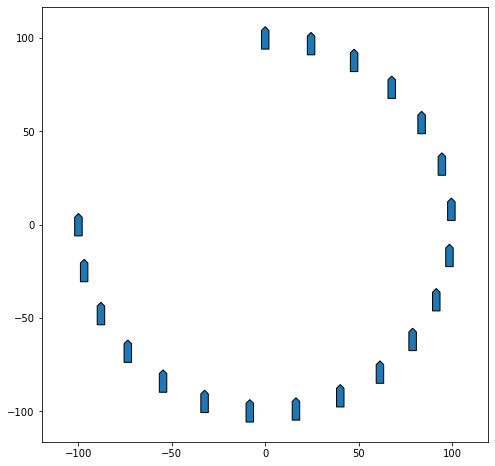

In [228]:
num_pos = 20
r = 100


t = np.linspace(0, 3/2*np.pi, num_pos)
pos=np.asarray([r*sin(t), r*cos(t)])

B = boat()

plt.figure(figsize=(8, 8))
plt.axis('equal')

# Loop through all the columns `p` of `pos`
for p in pos.T[...,None]:
    P = np.tile(p,(1,B.shape[1])) # Create matrix with all columns equal to the current column of pos
    A = B + P
    plt.fill(A[0,:],A[1,:],'C0', ec='k') # Plot the boat


The code illustrates the visualization of a simulated boat track using vector addition. The first step taken is to define a number of simulated boat positions through the statement `num_pos = 20`. The simulated track will be circular with a radius `r = 100`. 

A parametric representation of a circle using the parameter `t` is used, with `t` increasing along the arc of the circle. We define `t = np.linspace(0, 3/2*np.pi, num_pos)`, resulting in `\num_pos` angles `t[i]` along a circle segment $t\in[0,1\frac{1}{2}\pi]$

A matrix containing vertices representing a boat is then created through the statement `B = boat()` (see [1 2 Self Study Exercise 1](1_Introduction.ipynb#1_2_Self_Study_Exercise_1'))

We then use the parameter `t` to determine `num_pos` positions: `pos=np.asarray([r*sin(t), r*cos(t)])`. Note that we used the concept of heading here i.e., a zero angle points to the North direction and then increases in clockwise fashion.

We then use the `for p in pos.T[...,None]:` statement to iterate through the array of positions - note that `numpy` iterates rows first, so here we transposed `pos` and added an empty dimension so that the resulting `p` is a column vector. There are other ways of getting `p` to be a column vector, but this is efficient and commonly applied i.e., other coders will easily understand. If you want to understand this a little better `print` the arrays `pos`, `pos.T`, and `pos.T[...,None]` respectively - this should gain you some insight.

Once in the loop, the matrix `P` is created. `P` matches order with `B` and its columns are copies of `p` allowing for the use of the simple matrix addition of `A = B + P` to put the boat shape in the right position. The simple looking `A = B+p` also would have worked by having `broadcasting` deal with the order of the matrices. In fact, `A = B+p` is what you would typically see coded. However, that expression is, strictly speaking, not linear algebra.

There are much more efficient ways in which this code could be executed. However, optimizing the code for efficiency would not illustrate the principles of linear algebra very well and would lead to hard to read code. In general it is a good idea to write easily legible code and to only optimize those parts of the code that lead to significant increase in performance. Note that if you really need maximally optimized algorithms you would not implement them in Python in the first place. 

Here you were given a sneak peak at linear transformations which will be discussed further in [4 Linear Transformations](4_Linear_Transformations.ipynb). This illustration is somewhat unsatisfying as the boat is not oriented in the direction it is traveling. We can use linear algebra to not just translate, but also rotate the boat, You will learn about this in [4 Linear Transformations: Rotation](4_Linear_Transformations.ipynb#Rotation).

___

## 2.3 Inverse of a Matrix 

The matrix operation which is closest to the scalar operation of division is ***inversion***. The inverse of a matrix $\m{A}$ is denoted $\m{A}^{-1}$ and satisfies the relations:

 <a id='eq53'></a>
$$\m{A}\m{A}^{-1} = \m{A}^{-1}\m{A}=\m{I}\tag{53}$$

This demonstrates an important property of matrices whose inverse exists: If we apply a transformation $\m{A}$ then the result can can be transformed back completely by applying the inverse transformation $\m{A}^{-1}$, but only if $\m{A}^{-1}$ exists! For example, if $\m{y} = \m{Ax}$ then $\m{x} = \m{A}^{-1}\m{y}$ 

Inverses only exist in special circumstances. To enable us to describe when they exist the ***determinant*** and ***rank*** of a matrix are first defined. The practical problem of computing an inverse is then mentioned briefly. Manual computation quickly becomes a cumbersome and complex task, a good reason to use the Python `numpy` implementation to save a lot of work!

___
### 2.3.1 Inverse of a Matrix : Permutations and their Parity

First we need to understand permutations, say that we have $n$ elements then there may $n!$ ways of ordering these elements. For example if we have 3 elements then there are 6 permutations

$$S ={1,2,3}\tag{54}$$

The $3! = 6$ permutations are:

$$\begin{array}( (1,2,3)\\(1,3,2)\\(2,1,3)\\(2,3,1)\\(3,1,2)\\(3,2,1)\end{array}\tag{55}$$

The **identity permutation** $e_n$ keeps the $n$ elements in order"

$$e_3 = (1,2,3)\tag{56}$$

A transposition of two elements is then the permutation that switches the elements e.g. $(1,3,2)$ switches the elements $2$ and $3$ of $e_3$. The ***parity*** of transpositions it takes to get to the identify permutation is independent of how the transpositions are done.

$$ (1,3,4,2)\rightarrow(1,3,2,4)\rightarrow(1,2,3,4)\tag{even number of transpositions)  (57}$$
$$ (4,1,2,3)\rightarrow(3,1,2,4)\rightarrow(2,1,3,4)\rightarrow(1,2,3,4)\tag{odd number of transpositions)  (58}$$

When the number of transpositions to get to the identify permutation is even we have an ***even permutation*** , when the number is odd we have an ***odd permutation*** .


___
### 2.3.2 Inverse of a Matrix : Determinant

The determinant of a square matrix $\m{A}$ of dimension $n$ is a scalar denoted $\text{det}(\m{A})$ or $|\m{A}|$. the determinant is defined by the relation:

$$|\m{A}|=\sum\pm a_{1i}\:a_{2j}\dots a_{nk}\tag{59}$$

$i,j\dots k$ are permutations of integers $1,2\dots n$. The summation includes all $n!$ permutations. Individual terms obtain the positive sign for even permutations and the negative sign for odd  permutations.

If the determinant of a square matrix is equal to zero ($|\m{A}|=0$) the matrix is said to be **singular**. Those square matrices whose determinants differ from zero ($|\m{A}|\neq0$) are known as **nonsingular** matrices. Determinants have the properties:

$$|\m{A}^T|=|\m{A}|\tag{60}$$

$$|\m{A}\m{B}|=|\m{A}|\cdot|\m{B}|\tag{61}$$

The determinant of:

$$_3\m{A}_3=\begin{pmatrix}a_{11}&a_{12}&a_{13}\\a_{21}&a_{22}&a_{23}\\a_{31}&a_{32}&a_{33}\end{pmatrix}\tag{62}$$

is found by

$$|\m{A}|=\begin{array}+ +a_{11}a_{22}a_{33}\\
                         -a_{11}a_{23}a_{32}\\
                         -a_{12}a_{21}a_{33}\\
                         +a_{12}a_{23}a_{31}\\
                         +a_{13}a_{21}a_{32}\\
                         -a_{13}a_{22}a_{31}\end{array}\tag{63}$$

___
<img align="left" width="6%" style="padding-right:20px;" src="./Images/info.png">
For many linear algebra applications we want to perform operations on subsets of matrices. Using a different name to refer to the subset of a matrix is much more efficient than creating a new matrix with that name holding the data content of the subset. The `numpy.linalg` module makes heavy use of naming subsets of matrices to keep the code legible yet efficient

___

### 2.3.2 Self Study Exercise 1

In this exercise we will ask to calculate the determinant of a non-square matrix, which will lead to an error. Rather than letting the routine crash we want to catch this error by creating an exception that will print a polite reminder that you should provide a square matrix. For this we will place the code that potentially causes an error in a `try` block and catch the error in a `except` block.

The `numpy` `linalg` module includes all the operations defined in [2.2 Basic Matrix Operations](#Basic_Matrix_Operations). As is commonly done it is imported as `la` in this notebook: 
    
    import numpy.linalg as la
    
1. Create and display the matrix $\m{A}$ of (39) and assign it to `A`
2. Determine and display the determinant of `A`
3. Create a `try:` block of code 
4. In the `try:` block determine and show the determinant of `A` using `la.det()`
5. Create an `except:` block of code that will be executed when `la.det()` fails
6. In the `except:` block print an approriate message the failure was caused by `A` not being square
7. In the `except:` block also print an approriate message if the failure was caused by something else
8. Create a matrix `B` by subsetting the first two rows and columns of `A` using the `=` operator
9. Show that `B` occupies the same space in memory by changing element `B[0,0]` to zero and then displaying `A`
10. Determine and display the determinant of `B` in the same manner as steps (2.-7.)



In [229]:
# 2.3.2 Self Study Exercise 1

# 1. Create and display the matrix `A` of(39)
A = np.asarray([[1, 7, -2], [4, 3, 5]])
print('A:')
display_matrix(A)

# 3. Create a `try:` block of code
try:
    # 4. determine and show the determinant of `A`
    det_A = la.det(A)
    print('det(A) = ' + str(det_A))
except:
    # 6. Print an approriate message the failure was caused by `A` not being square
    if not A.shape[0] == A.shape[1]:
        print('Matrix A must be square to calculate its determinant.')

    # 7. Also print an approriate message if the failure was caused by something else
    else:
        print('Error: Must add code to address this error')

# 8. Create a matrix `B` by subsetting the first two rows and columns of `A` using the `=` operator
B = A[0:2, 0:2]
print('B:')
display_matrix(B)

# 9. Show that `B` refers to a subset of `A` by setting `B[0, 0]` to zero and then displaying `A`
B[0, 0] = 0
print('A:')
display_matrix(A)


# 10. Determine and display the determinant of `B` in the same manner as steps (2.-7.)
try:
    det_B = la.det(B)
    print('det(B) = ' + str(det_B))
except:
    if not B.shape[0] == B.shape[1]:
        print('Matrix B must be square to calculate its determinant.')
    else:
        print('Error: Must add code to address this error')

A:


<IPython.core.display.Math object>

Matrix A must be square to calculate its determinant.
B:


<IPython.core.display.Math object>

A:


<IPython.core.display.Math object>

det(B) = -27.999999999999996


___
Worked Example:

<img align="left" width="50%" style="padding-left:100px;padding-right:10px" src="Images/sse2_3_2_1.png">

___
### 2.3.3 Inverse of a Matrix : Rank

The rank of any matrix, which need not be square, is the order of its largest square non-singular submatrix. The concept of rank has great importance in the solution of linear equations. To elaborate: a smaller submatrix can be obtained from any matrix by discarding some of the rows and columns of the original matrix. If we discard only the minimum of rows and columns needed to obtain a square nonsingular submatrix (non-zero determinant), then the order of that submatrix is the ***rank*** of the original matrix. If a matrix is already nonsingular then its rank is equal to its order. For example, given:

$$_5\m{B}_4=\begin{pmatrix}1&2&1&0\\3&2&1&2\\5&6&3&2\\2&-1&2&5\\1&3&-1&-3\end{pmatrix}\tag{64}$$

If we discard the third and fifth rows and fourth column we have:

$$_3\m{A}_3=\begin{pmatrix}1&2&1\\3&2&1\\2&-1&2\end{pmatrix}\tag{65}$$

Which using (63) can be shown to have determinant $|\m{A}|=10$. It can also be shown that there is no $4\times4$ submatrix of $\m{B}$ for which the determinant is nonzero. Hence $\m{A}$ is the largest order nonsingular submatrix of $\m{B}$, and the rank of $\m{B}$ is equal to the order of $\m{A}$ i.e. $\text{rank}(\m{B}) = 3$


Note that for this we will use the `numpy.linalg` module which we imported as `la`

___

### 2.3.3 Self Study Exercise 1

1. Create and display the matrix $\m{B}$ of (64) using the `numpy` array `B`
2. `try:` printing $|\m{B}|$ using `la.det()`, `except:` `print( 'B is singular')`
3. create a column vector `row_select` with the indexes of the rows you want to extract from `B` to create `A` of(65), don't forget that `Python` indexing starts at 0!
4. reate a row vector `col_select` with the indexes of the columns you want to extract from `B` to create `A`.
5. Create and display array `A` representing $\m{A}$ as in (65) by sub-setting `B` using `row_select` and `col_select` as the index vectors.
6. Determine and display the determinant of `A` using similar to 2.
7. Determine the rank of `B`  using `la.matrix_rank()` and assign it to `rank_B`
8. Print and the rank and shape of `B`
9. How would you determine whether the matrix is full rank i.e., its rank is equivalent to its order parameters?


In [230]:
### 2.3.3 Self Study Exercise 1

# 1. Create and display (64) using the `numpy` array `B`
B = np.asarray([[1,2,1,0],[3,2,1,2],[5,6,3,2],[2,-1,2,5],[1,3,-1,-3]])
print('B:')
display_matrix(B)

# 2. `try:` printing `la.det()`, `except:` `print( 'B is singular')`
try: 
    print( '|B| = %.2f'%la.det(B))
except:
    print( 'B is singular')

# 3. create a column vector `row_select`
row_select = [[0],[1],[3]]

# 4. create a row vector `col_select`
col_select = [[0,1,2]]

# 5. Create matrix `A`
A = B[row_select,col_select]
print('A:')
display_matrix(A)

# 6. Determine and display the determinant of `A`
try: 
    print( '|A| = %.2f'%la.det(A))
except:
    print( 'A is singular')

# 7. Determine the rank of B using `la.rank()` and assign it to `rank_B`
rank_B = la.matrix_rank(B)
print( 'Rank(B) = %d'%rank_B)
print( 'Order(B) = %d,%d'%(B.shape[0],B.shape[1]))

# 9. How would you determine whether the matrix is full rank?
q_2_3_3_1 = 'I would determine whether the matrix is full rank by checking that the' 
q_2_3_3_1 += 'order matches the rank'

B:


<IPython.core.display.Math object>

B is singular
A:


<IPython.core.display.Math object>

|A| = -10.00
Rank(B) = 3
Order(B) = 5,4


___
Worked Example:

<img align="left" width="40%" style="padding-left:100px;padding-right:10px" src="Images/sse2_3_3_1.png">

___
### 2.3.4 Inverse of a Matrix : Regular Inverse

Only nonsingular matrices have a regular inverse. Singular matrices do not have a regular inverse. Inverses have the following properties:

$$(\m{A}^{-1})^{-1} = \m{A}\tag{67}$$

$$(\m{A}\m{B})^{-1} = \m{B}^{-1}\m{A}^{-1}\tag{Note the reverse order)  (68}$$

$$|\m{A}^{-1}| = \dfrac{1}{|\m{A}|}\tag{70}$$

In `numpy.linalg` the inverse of a matrix is given by `numpy.linalg.inv`. With the way we imported the modules in this notebook we would use `la.inv(A)` to determine the inverse of `A`

___
### 2.3.5 Inverse of a Matrix : Orthogonal Matrix

An ***orthogonal matrix***  has the special property that all the columns form column-vectors orthogonal to each-other and similarly all the rows form row-vectors orthogonal to each-other. For an orthogonal matrix its transpose and inverse are equal i.e.:

$$f(x) = \left\{\begin{array}+{}\text{orthogonal} &\text{if } \m{A}^{T} = \m{A}^{-1}\\\text{non-orthogonal}&\text{if } \m{A}^{T} \neq \m{A}^{-1}\end{array}\right. \tag{71}$$

or

$$f(x) = \left\{\begin{array}+{}\text{orthogonal} &\text{if } \m{A}\m{A}^{T} = \m{I}\\\text{non-orthogonal}&\text{if } \m{A}\m{A}^{T} \neq \m{I}\end{array}\right. \tag{72}$$

Finally: the product of two orthogonal matrices is also orthogonal and the ***determinant of an orthogonal matrix is unity***



___

### 2.3.5 Self Study Exercise 1

$$ \m{R}=\begin{pmatrix}\cos\theta & \sin\theta \\ -\sin\theta & \cos\theta\end{pmatrix}$$

1. Create the variable `th` and assign it the value 𝜋/6
2. Using `th` for 𝜃 calculate the matrix $\m{R}$ shown above and assign it to `numpy` array `R`
3. Determine the inverse of `R` and assign it to `Ri`
4. Calculate and display the product of `R` and `Ri` both using the `print()` and `display_matrix()` functions
5. Comment on the relation between an Identity matrix and matrix `R@Ri` based on both the `print()` and `display_matrix()` outputs
6. Given your answer to 5. argue why it is generally better to use the `assert_allclose()` method than the `==` operator to test whether the product of two matrices resembles an identity matrix.

In [231]:
# 2.3.5 Self Study Exercise 1

# 1. Create the variable `th` and assign it the value 𝜋/6
th = pi/6

# 2. Calculate and assign the rotation matrix `R`, rotating by `th`
R = np.asarray([[cos(th), sin(th)], [-sin(th), cos(th)]])

# 3. Determine the inverse of `R` and assign it to `Ri`
Ri = la.inv(R)

# 4. Calculate and display the product of `R` and `Ri` using `print()` and `display_matrix()`
print('R x Ri:')
print(R@Ri)

print('\nR x Ri:')
display_matrix(R@Ri)

# 5. Comment on the relation between an Identity matrix and matrix `R@Ri`
q_2_3_5_1_1 = 'The relation between `R@Ri and ...'
q_2_3_5_1_2 = 'It is generally better to use the `assert_allclose()` method ...'

R x Ri:
[[ 1.00000000e+00  7.43708407e-18]
 [-4.06369831e-17  1.00000000e+00]]

R x Ri:


<IPython.core.display.Math object>

___
Worked Example:

<img align="left" width="40%" style="padding-left:100px;padding-right:10px" src="Images/sse2_3_5_1.png">

___
The matrix $\m{R}$ defined above is a Rotation Matrix and represents another sneak peek at [4 Linear Transformations](4_Linear_Transformations.ipynb). To illustrate the effect of $\m{R}$ and its inverse $\m{R}^{-1}$ the `boat()` function is used, this function is similar to the one that you created in [1_2_Self_Study_Exercise_1](1_Introduction.ipynb#1_2_Self_Study_Exercise_1'). 

Matrix B holds a polygon defining a boat shape


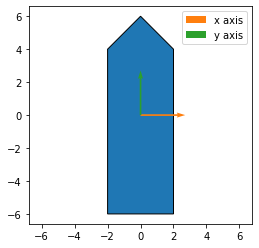

<IPython.core.display.Math object>

In [247]:
B = boat()
A = np.asarray([[1, 0], [0, 1]])  # The coordinate axes
origin = np.array([0, 0])  # origin point
print('Matrix B holds a polygon defining a boat shape')
axis = ['x', 'y']  # x is the first axis, y the second

plt.figure(figsize=(4, 4))
# plt.gca().invert_yaxis()
plt.axis('equal')
plt.fill(B[0, :], B[1, :], 'C0', ec='k')
for i in range(A.shape[0]):
    c = 'C'+str(i % 9+1)
    plt.quiver(*origin, A[i, 0], A[i, 1], color=c,
               scale=5, label=axis[i]+' axis')
plt.legend()
plt.show()

display_matrix(B)

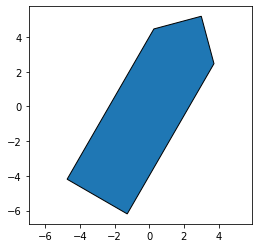

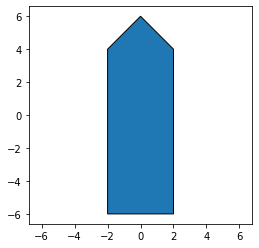

In [252]:
B = boat()
th = pi/6
R = np.asarray([[cos(th), sin(th)], [-sin(th), cos(th)]])
Ri = la.inv(R)
# Now rotate the boat
Br = R@B

plt.figure(figsize=(4, 4))
plt.axis('equal')
plt.fill(Br[0, :], Br[1, :], 'C0', ec='k')
plt.show()

# Now rotate the boat back
Br = Ri@Br

plt.figure(figsize=(4, 4))
plt.axis('equal')
plt.fill(Br[0, :], Br[1, :], 'C0', ec='k')
plt.show()

In the code cell above we created matrix $\m{B}$ holding a boat shape. To rotate the Boat matrix $\m{B}$ was multiplied by $\m{R}$ to create $\m{B}_r$, to rotate $\m{B}_r$ back to $\m{B}$ it was simply multiplied by the inverse rotation matrix $\m{R}^{-1}$.

 ___
 <a id='Inverse_of_a_Matrix_Computation'></a>
 ### 2.3.6 Inverse of a Matrix: Computation
 
 Many methods for computing matrix inverses exist; some of these are direct methods, others require several iteration cycles. Some can be applied to any non-singular matrix, and some require special properties (such as symmetry). In fact, the matrices that we most often want to invert in Ocean Mapping are those involved in least-squares estimation and approximation, and have special properties: they are symmetric and positive definite (this will be defined in [4 Linear Transformations](4_Linear_Transformations.ipynb#Eigenvalue_Matrix_Characterization)). In this case the method that is most efficient and suffers least from computer roundoff is the **Choleski** method, which is described in [6 Choleski Method](6_The_Choleski_Method.ipynb).
 
 The problem of computing an inverse is closely related to the problem of solving a set of linear equations (discussed more fully in [3_Solution_of_Linear_Equations](3_Solution_of_Linear_Equations.ipynb)). Here we show how computation of the inverse matrix can be formulated as the problem of solving systems of linear equations. In [3.2.2 Computation of Systems Having a Unique Solution](3_Solution_of_Linear_Equations.ipynb#Computation_of_Systems_Having_a_Unique_Solution) we show the reverse - how the computation of an inverse is involved in the solution of a system of linear equations.
 
 Given a square non-singular matrix $\m{A}$ we wish to find the elements of its inverse:
 
 $$\m{B} = \m{A}^{-1}\tag{73}$$
 
 Such that:
 
 $$\m{AB} = \m{I}\tag{74}$$
 
 from [$(25)$](#eq25) we have the $n^2$ equations:
 
  $$c_{ij} = \sum_{k=1}^{n}a_{ik}b_{k,j}=\begin{cases}{} 0 & i\neq j\\ 1 & i = j \end{cases}\tag{75}$$
 
 Since we know the elements $a_{ij}$ of $\m{A}$, these $n^2$ equations form a system of equations with the $n^2$ unknowns $a_{ij}$, the elements of $\m{B} $. In fact, we can break these up in into $n$ independent sets of equations, each having the $n$ elements of one columns of $\m{B}$ as unknowns. For example, given:
 
 $$_3\m{A}_3 = \begin{pmatrix} 1 & 2 & 1 \\ 3 & 2 & 1 \\ 2 & -1 & 2 \end{pmatrix}\tag{76}$$
 
 we can solve the $n^2$ equations:
 
 $$\m{AB} = \begin{pmatrix} 1 & 2 & 1 \\ 3 & 2 & 1 \\ 2 & -1 & 2 \end{pmatrix}\begin{pmatrix} b_{11} & b_{12} & b_{13}\\ b_{21} & b_{22} & b_{23} \\ b_{31} & b_{32} & b_{33} \end{pmatrix}=\begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}=\m{I}\tag{77}$$
 
 to obtain the elements $b_{ij}$ of 
 
 $$\m{B} = \m{A}^{-1}\tag{78}$$
 
 For the first columns of $\m{B}$, these are:
 
$$\begin{array}. 1b_{11}+2b_{21}+1b_{31} &=1 \\ 3b_{11}+2b_{21}+1b_{31} &=0 \\ 2b_{11}-1b_{21}+2b_{31} &=0  \end{array}\tag{79}$$
 
 Which has the solution:
 
 $$\begin{array}. b_{11} = \dfrac{-5}{10} \\ b_{21} = \dfrac{4}{10} \\ b_{11} = \dfrac{7}{10}\end{array}\tag{80}$$
 
 The complete solution for $\m{B}$ is then:
 
 $$\m{B} = \m{A}^{-1} = \dfrac{-1}{10}\begin{pmatrix}5 & -5 & 0 \\ -4 & 0 & 2 \\ -7 & 5 & -4\end{pmatrix}$$
 

____
### 2.3.6 Self Study Exercise 1

1. Verify the correctness of the numerical example shown in equations (76) through (81), by using the `numpy` `linear algebra` function `inv` (in this case `la.inv(A)`)

In [253]:
# 2.3.6 Self Study Exercise 1

# 1. Verify the correctness of the numerical example shown in equations (76) through (81)

print('A = ')
A = np.array([[1, 2, 1], [3, 2, 1], [2, -1, 2]])
display_matrix(A)
print('A inverse:')
display_matrix(la.inv(A))

A = 


<IPython.core.display.Math object>

A inverse:


<IPython.core.display.Math object>

___
Worked Example:

<img align="left" width="30%" style="padding-left:100px;padding-right:10px" src="Images/sse2_3_6_1.png">

 ___
 <a id='Inverse_of_a_Diagonal_Matrix_Computation'></a>
 ### 2.3.6.1 Inverse of a Diagonal Matrix: Computation
 
A diagonal matrix $\m{D}$ is also known as a scalar matrix. It has the special property that if it is multiplied by another matrix the resulting matrix will have its rows multiplied by the corresponding element on the diagonal matrix. Given [$\m{A}\m{A}^{-1} = \m{A}^{-1}\m{A}=\m{I}$](#'eq53') it follows that

$$\m{D}\m{D}^{-1} =\begin{pmatrix} d_{1,1}&0&\dots&0 \\ 0&d_{2,2}&\dots&0 \\ \vdots &\vdots&\ddots&\vdots \\
0&0&\dots&d_{n,n}\end{pmatrix}\begin{pmatrix}\dfrac{1}{d_{1,1}}&0&\dots&0 \\ 0&\dfrac{1}{d_{2,2}}&\dots&0 \\ \vdots &\vdots&\ddots&\vdots \\
0&0&\dots&\dfrac{1}{d_{n,n}}\end{pmatrix}=\m{I}\;\;\;d_{i,i}\neq 0\;\;\forall\;\; i\tag{81}$$

Thus the inverse of a diagonal matrix $\m{D}$ with all non-zero elements on the diagonal is another diagonal matrix with the reciprocal values of the elements of $\m{D}$; $\m{D}^{-1}$ will exist as long as none of the values on the diagonal of $\m{D}$ are zero.


In [258]:
D = np.array([[1,0,0],[0,2,0],[0,0,3]])
print('Diagonal matrix D:' )
display_matrix(D)
print('Diagonal matrix I:' )
I = np.ones((3,3))
display_matrix(I)
print('DI:' )
display_matrix(D@I)
x = np.ones((3,1))
print('vector x:' )
display_matrix(x)
print('Dx:' )
display_matrix(D@x)

Diagonal matrix D:


<IPython.core.display.Math object>

Diagonal matrix I:


<IPython.core.display.Math object>

DI:


<IPython.core.display.Math object>

vector x:


<IPython.core.display.Math object>

Dx:


<IPython.core.display.Math object>

___
### 2.3.7 Inverse of a Matrix: Generalized Inverse

So far we have considered the **regular** inverse of a matrix $\m{A}$ which is denoted by $\m{A}^{-1}$ and which satisfies equation ([53](#eq53)). The regular inverse $\m{A}^{-1}$ only exists when $\m{A}$ is square and non-singular i.e., the rank of $_n\m{A}_n$ is $n$.

It is possible to expand the definition of the inverse to apply to rectangular matrices $_m\m{A}_n$ of arbitrary rank. In this case we are dealing with ***generalized inverses***, which we denote by $\m{A}^-$, reserving for regular inverses the symbol $\m{A}^{-1}$. Generalized inverses must satisfy the relation:

$$\m{A}\m{A}^-\m{A} = \m{A}\tag{82}$$

rather than satisfying [53](#eq53). However, this condition is not sufficient to define a unique $\m{A}^-$. We can narrow down the possibilities by imposing one or more conditions on $\m{A}^-$, such as:

$$\m{A}\m{A}^-\m{A} = \m{A}\tag{83}$$

$$(\m{A}\m{A}^-)^T = \m{A}\m{A}^-\tag{84}$$

$$(\m{A}^-\m{A})^T = \m{A}^-\m{A}\tag{85}$$

A generalized inverse which satisfies all four of these conditions is unique and is known as a ***Moore Penrose inverse***, or more commonly as a ***pseudo inverse***, denoted by $\m{A}^+$. Techniques for computing $\m{A}^+$ are implemented in the `linear algebra` module of `numpy` in the `pinv()` function. Mathematical description of finding the solution to calculating the pseudo inverse is far beyond the scope of these Notebooks, but the interested reader may refer to [Rao, C.R. and Mitra, S.K. (1971) Generalized Inverse of Matrices and Its Applications](https://archive.org/details/in.ernet.dli.2015.141571/mode/2up).

An example of a matrix $\m{A}$ and its pseudo inverse $\m{A}^+$ is:

$$_3\m{A}_3 = \begin{pmatrix} 1 & 10  & 15 \\ 10 & 4 & 6 \\ 15 & 6 & 9 \end{pmatrix}\tag{86}$$

$$_3\m{A}^+_3 =\dfrac{-1}{312} \begin{pmatrix} 13 & -10  & -15 \\ -10 & \dfrac{4}{13} & \dfrac{6}{13} \\ -15 & \dfrac{6}{13} & \dfrac{9}{13} \end{pmatrix}\tag{87}$$

Note that both $\m{A}$ and  $\m{A}^0$ have zero-determinants i.e., are singular.


____
### 2.3.7 Self Study Exercise 1

1. Create the numpy array `A` representing matrix $\m{A}$ of (86)
2. Verify the correctness of the numerical example shown in (87), by using the `numpy` `linear algebra` function `pinv` (in this case `la.pinv(A)`). Note that it will be helpful to multiply the result by ${-312}$ for the purpose

In [262]:
# 1. Create the numpy array `A` representing matrix $\m{A}$ of (86)
A = np.array([[1, 10, 15],[10, 4, 6],[15, 6, 9]])

#2. Verify the correctness of the numerical example shown in (87)
print('Generalized inverse: -1/312*')
display_matrix(-312*la.pinv(A))

Generalized inverse: -1/312*


<IPython.core.display.Math object>

___
Worked Example:

<img align="left" width="35%" style="padding-left:100px;padding-right:10px" src="Images/sse2_3_7_1.png">

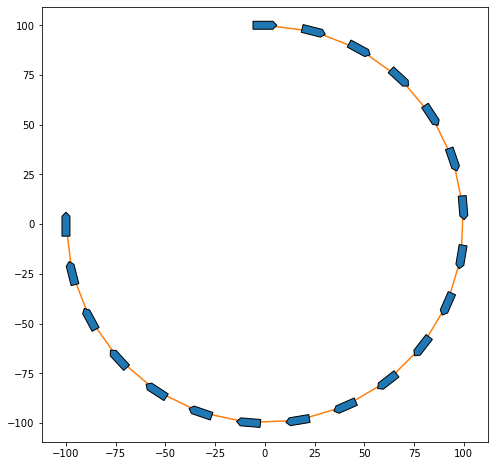

In [35]:
num_pos = 20
r = 100

t = np.linspace(0, 3/2*np.pi, num_pos)
h = t + pi/2
pos=np.asarray([r*sin(t), r*cos(t)])

R = np.asarray([[cos(-pi/2), sin(-pi/2)],[-sin(-pi/2),cos(-pi/2)]])
B = R@boat()

plt.figure(figsize=(8, 8))
plt.axis('equal')

# The code below is relatively efficient, but can be optimized 
# significanly further (at the cost of readability)

p_prev = pos[0:2,0:1]
for i in range(pos.shape[1]):
    p = pos[0:2,i:i+1]
    plt.plot([p_prev[0,0], p[0,0]],[p_prev[1,0], p[1,0]],'C1',zorder=0)
    R = np.asarray([[cos(h[i]), sin(h[i])],[-sin(h[i]),cos(h[i])]])
    C = R@B+p
    plt.fill(C[0,:],C[1,:],'C0', ec='k',zorder=1)
    p_prev = p


In [36]:
h


array([1.57079633, 1.8188168 , 2.06683727, 2.31485774, 2.56287822,
       2.81089869, 3.05891916, 3.30693964, 3.55496011, 3.80298058,
       4.05100105, 4.29902153, 4.547042  , 4.79506247, 5.04308294,
       5.29110342, 5.53912389, 5.78714436, 6.03516483, 6.28318531])

___
## Useful Resources

[Rao, C.R. and Mitra, S.K. (1971) Generalized Inverse of Matrices and Its Applications. John Wiley & Sons, New York.](https://archive.org/details/in.ernet.dli.2015.141571/mode/2up)

[Gilbert Strang MIT video lecture series](https://ocw.mit.edu/courses/18-06-linear-algebra-spring-2010/video_galleries/video-lectures/)

___
## Jump to Chapter

[1: Introduction](1_Introduction.ipynb)<br>
[3: Solution_of_Linear_Equations](3_Solution_of_Linear_Equations.ipynb)<br>
[4: Linear Transformations](4_Linear_Transformations.ipynb)<br>
[5: Solution of Nonlinear Equations](5_Solution_of_Nonlinear_Equations.ipynb)<br>
[6: The Choleski Method](6_The_Choleski_Method.ipynb) <br>

___
#### Copyright 2022, Semme J. Dijkstra

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.